# CodSoft Task 1 (Movie Genre Classification)                                                                                                          

### To develop a machine learning model capable of predicting the genre of a movie utilizing its plot summary or associated textual data. This endeavor will explore text processing techniques, including TF-IDF and evaluate the performance of various methods, namely Naive Bayes and Support Vector Machines.

Step 1: Extracting and filtering the data

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("C://Users//91990//OneDrive//Documents//Genre Classification Dataset//train_data.txt", delimiter='\t', header=None, names=['Genre', 'Plot'])
test_data = pd.read_csv("C://Users//91990//OneDrive//Documents//Genre Classification Dataset//train_data.txt", delimiter='\t', header=None, names=['Genre', 'Plot'])

In [3]:
train_data.head()

,Genre,Plot
0,1 ::: Oscar et la dame rose (2009) ::: drama :...,NaN
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...,NaN
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu...",NaN
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...,NaN
4,5 ::: The Unrecovered (2007) ::: drama ::: The...,NaN


In [4]:
# Split the 'Genre' column based on the delimiters
train_data[['ID', 'Title_Year', 'Genre', 'Plot']] = train_data['Genre'].str.split(':::', expand=True)
# Extract the year from the 'Title_Year' column and create a separate 'Year' column
train_data['Year'] = train_data['Title_Year'].str.extract(r'\((\d{4})\)')
# Remove the year from the 'Title_Year' column to keep only the title
train_data['Title'] = train_data['Title_Year'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
# Drop the original 'Genre' and 'Title_Year' columns as they are no longer needed
train_data.drop(columns=['Title_Year'], inplace=True)
# Rearrange the columns for better readability
train_data = train_data[['ID', 'Title', 'Year', 'Genre', 'Plot']]
# Display the cleaned training data
train_data.head()

,ID,Title,Year,Genre,Plot
0,1,Oscar et la dame rose,2009,drama,Listening in to a conversation between his do...
1,2,Cupid,1997,thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful",1980,adult,As the bus empties the students for their fie...
3,4,The Secret Sin,1915,drama,To help their unemployed father make ends mee...
4,5,The Unrecovered,2007,drama,The film's title refers not only to the un-re...


In [5]:
# Display more rows of the original test data to further understand its structure
test_data.sample(20)

,Genre,Plot
47317,47318 ::: Tales of the Unknown (1990) ::: horr...,NaN
52612,"52613 ::: ""Walk on the Wild Side"" (2009) ::: c...",NaN
51661,51662 ::: Environmental Heroes (2009) ::: shor...,NaN
50709,50710 ::: 20 nuits et un jour de pluie (2006) ...,NaN
35286,35287 ::: Adik manja Returns (2012) ::: comedy...,NaN
44774,"44775 ::: Don't Go (2007) ::: drama ::: ""Don't...",NaN
40985,40986 ::: Navajo Kid (1945) ::: western ::: Wh...,NaN
48457,48458 ::: Cerca di capirmi (1970) ::: comedy :...,NaN
53998,53999 ::: Broadminded (1931) ::: comedy ::: Ja...,NaN
46120,46121 ::: The Night of the Iguana (1964) ::: d...,NaN


In [6]:
# Check for missing values in the training data
missing_values = train_data.isnull().sum()
missing_values

ID          0
Title       0
Year     4347
Genre       0
Plot        0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the training data into training and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Genre'])

train_df.shape, val_df.shape

((43371, 5), (10843, 5))

Step 2:Extraction through TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the plots of the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Plot'])

# Transform the plots of the validation data
X_val_tfidf = tfidf_vectorizer.transform(val_df['Plot'])

# Extract the genre labels for training and validation
y_train = train_df['Genre']
y_val = val_df['Genre']

X_train_tfidf.shape, X_val_tfidf.shape

((43371, 5000), (10843, 5000))

Step 3: Visualization through graphical representation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


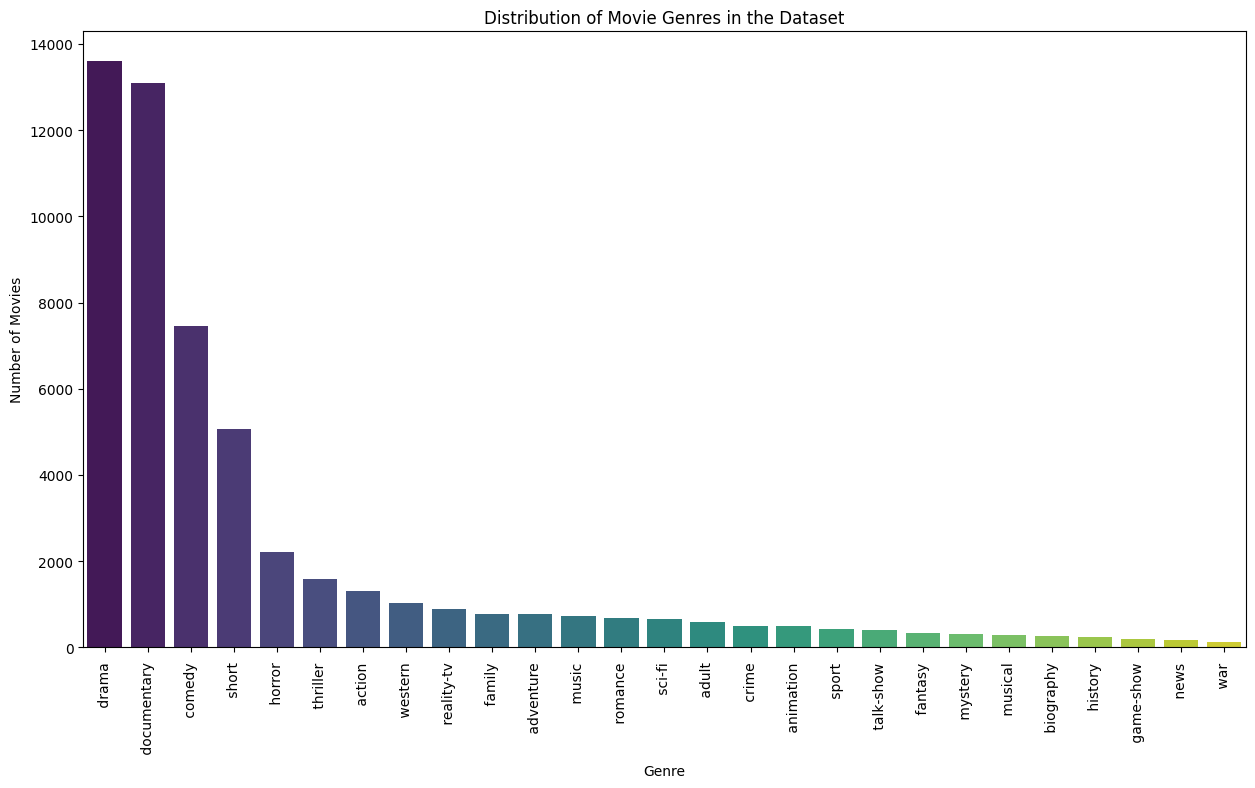

In [10]:
# Visualization for the distribution of movie genres

plt.figure(figsize=(15, 8))
genre_counts = train_data['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

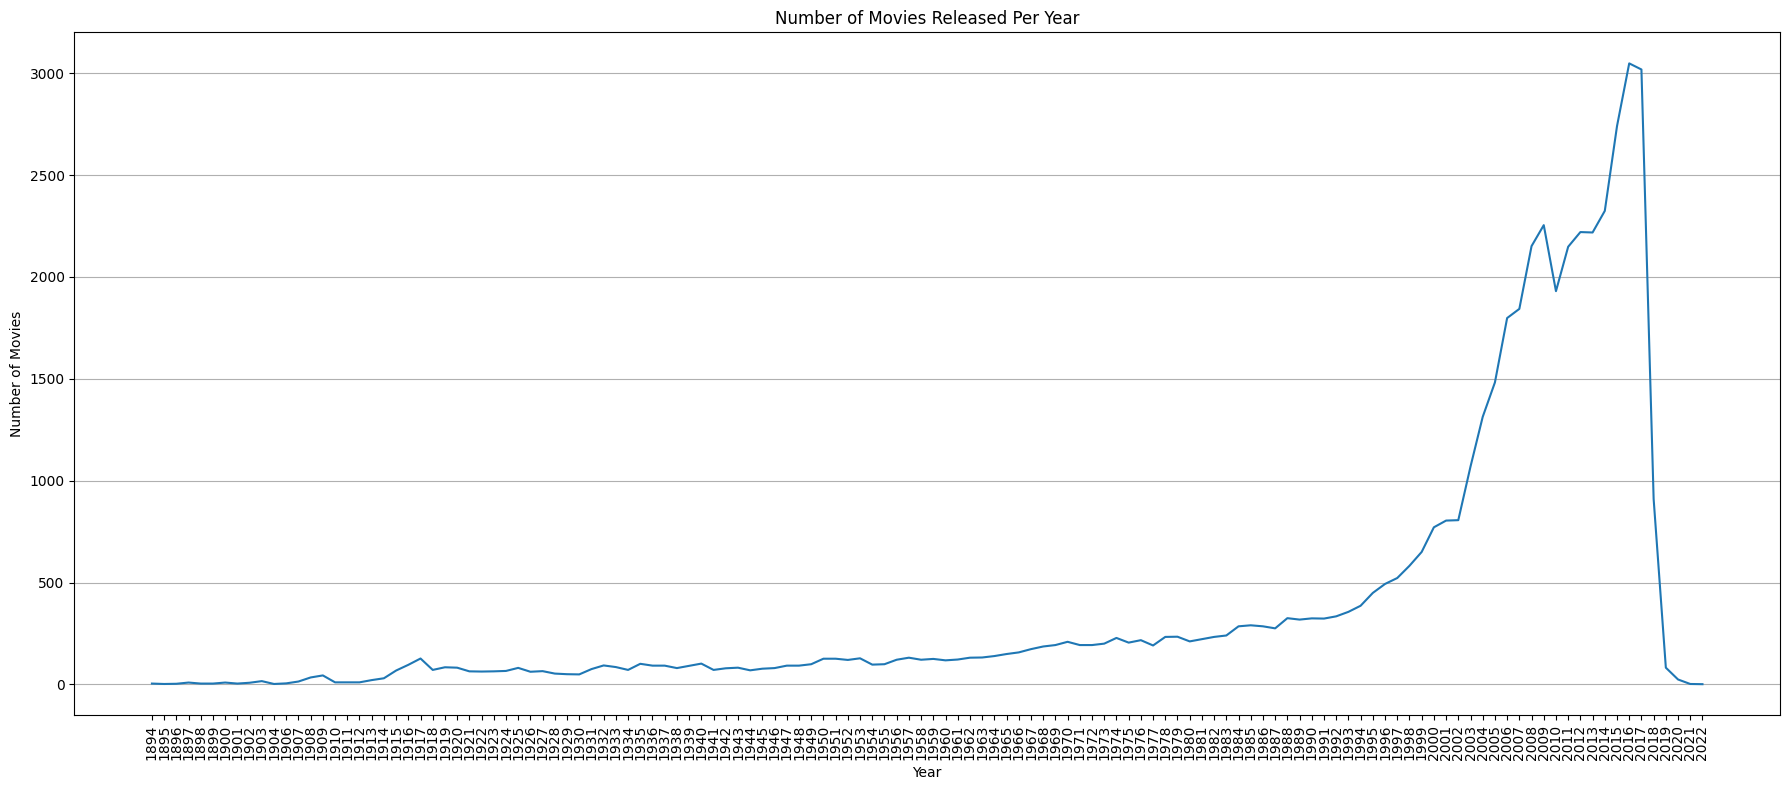

In [11]:
# Visualizing the number of movies released per year
plt.figure(figsize=(18, 8))
year_counts = train_data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

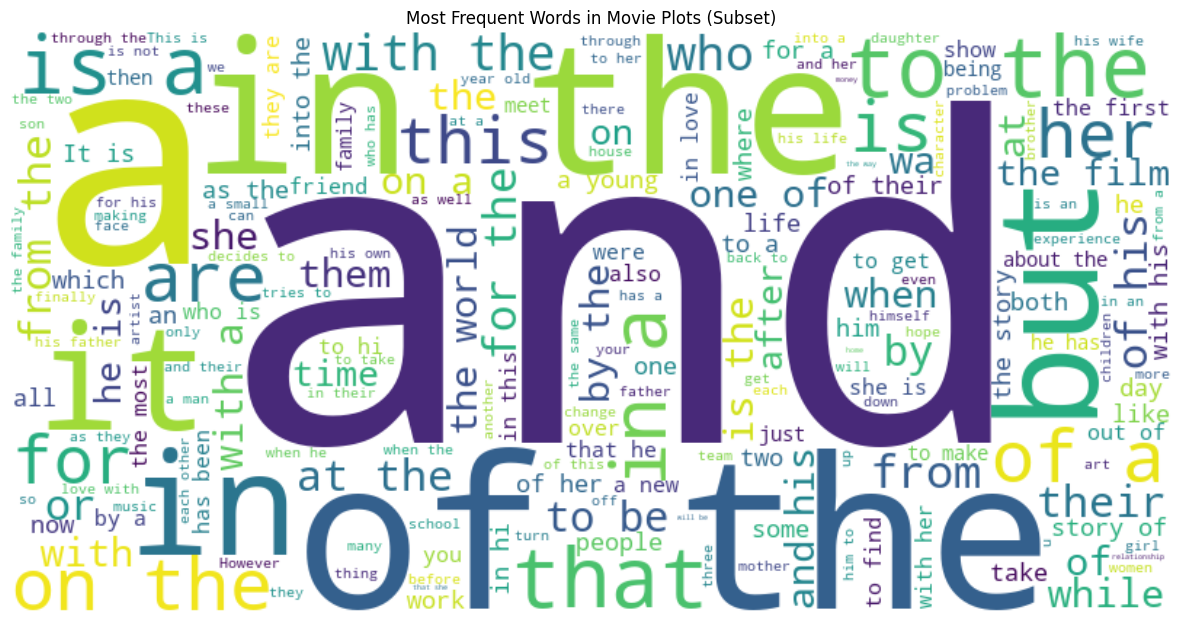

In [12]:
# Necessary imports for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Taking a subset of the data for the word cloud
subset_plots = ' '.join(train_data['Plot'].sample(5000))

# Create a word cloud for the subset of movie plots
wordcloud_subset = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(subset_plots)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_subset, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Movie Plots (Subset)')
plt.show()

Step 4:Using machine learning method through Naive Bayes

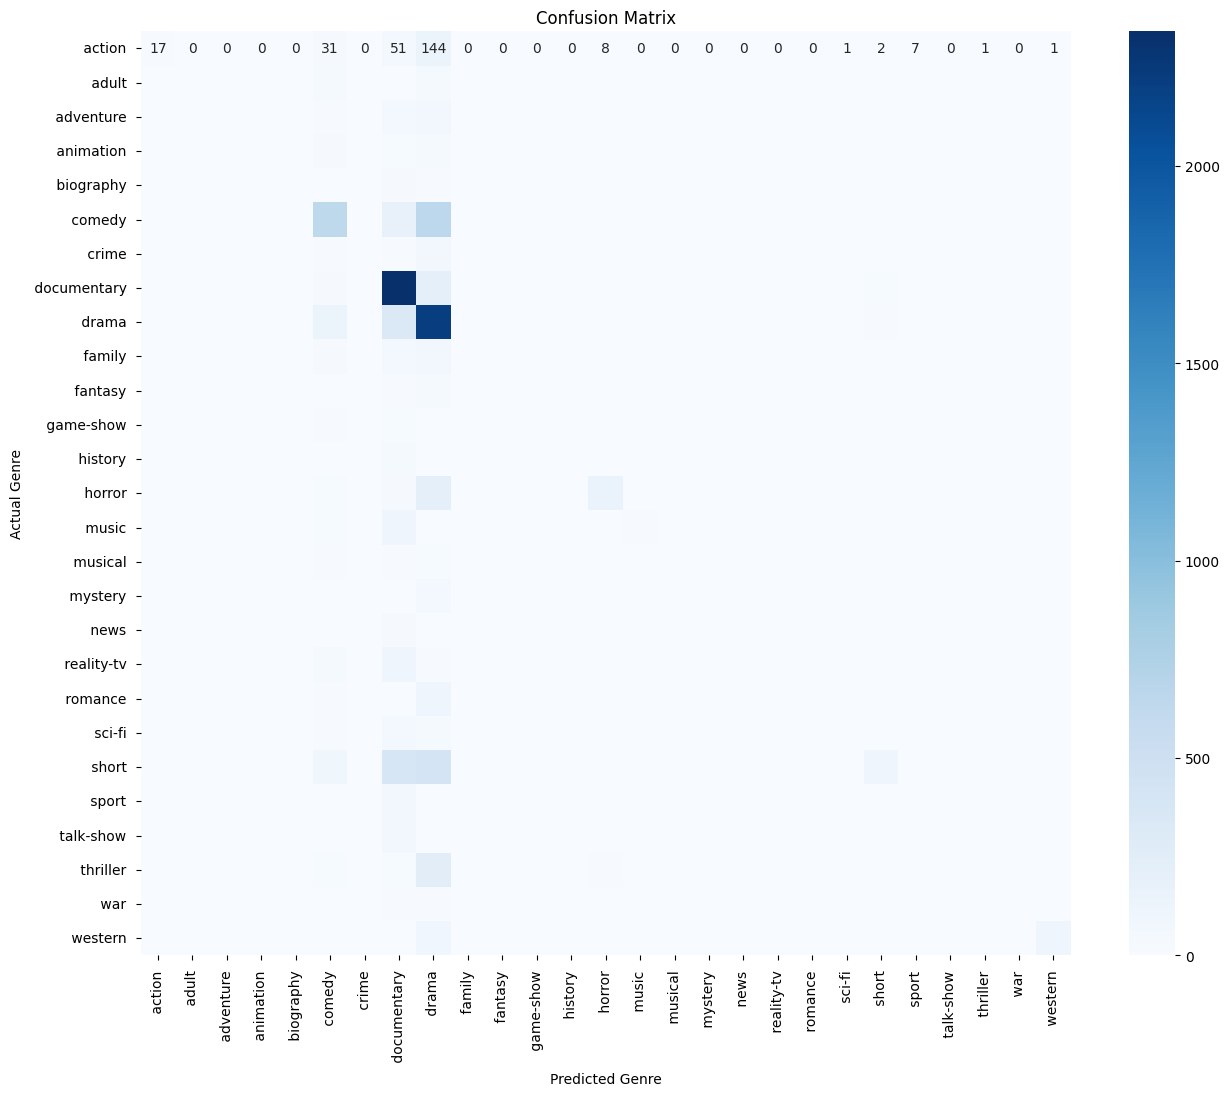

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_pred = nb_classifier.predict(X_val_tfidf)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred, labels=nb_classifier.classes_)

# Display the confusion matrix using Seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.title('Confusion Matrix')
plt.show()

Step 5: Prediction

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the genres for the validation set
y_val_pred = nb_classifier.predict(X_val_tfidf)

# Calculate the accuracy of the model on the validation set
accuracy = accuracy_score

In [15]:
import numpy as np

# Select a random year from the dataset
random_year = np.random.choice(train_data['Year'].dropna().unique())

# Filter the dataset for movies from the selected year
movies_from_year = train_data[train_data['Year'] == random_year]

# For each movie, predict the genre and get the probability of the predicted genre
predicted_probs = nb_classifier.predict_proba(tfidf_vectorizer.transform(movies_from_year['Plot']))
predicted_genres = nb_classifier.classes_[np.argmax(predicted_probs, axis=1)]
max_probs = np.max(predicted_probs, axis=1)

# Get the index of the movie with the highest probability
best_movie_index = np.argmax(max_probs)
best_movie = movies_from_year.iloc[best_movie_index]

random_year, best_movie['Title'], best_movie['Genre'], best_movie['Plot']


('1995',
 "The Making of 'Jurassic Park'",
 ' documentary ',
 " This documentary treats film fans to a behind-the-scenes look at the making of Jurassic Park, one of the 90's biggest hits and a milestone in special effects development. Narrated by James Earl Jones, it includes footage of the filming process, as well as interviews with director Steven Spielberg, and other members of the cast and crew, who give their insights into what it was like working together on this project and the efforts it took to bring the film to completion.")

In [16]:
import numpy as np

# Select a random year from the dataset
random_year = np.random.choice(train_data['Year'].dropna().unique())

# Filter the dataset for movies from the selected year
movies_from_year = train_data[train_data['Year'] == random_year]

# For each movie, predict the genre and get the probability of the predicted genre
predicted_probs = nb_classifier.predict_proba(tfidf_vectorizer.transform(movies_from_year['Plot']))
predicted_genres = nb_classifier.classes_[np.argmax(predicted_probs, axis=1)]
max_probs = np.max(predicted_probs, axis=1)

# Get the index of the movie with the highest probability
best_movie_index = np.argmax(max_probs)
best_movie = movies_from_year.iloc[best_movie_index]

random_year, best_movie['Title'], best_movie['Genre'], best_movie['Plot']


('1946',
 'Roaring Rangers',
 ' western ',
 " When Sheriff Jeff Connor of Powder River cannot stop the crime wave, his young son, Larry, writes to the Durango Kid for aid. Taggart, the saloon owner, is the secret head of the outlaws, while Connor's brother Bill is in cahoots with him. Steve Randall, the Durango Kid, and his pal, Smiley Butterbean, arrive in time to stop a stagecoach holdup, and Steve is made a deputy sheriff. Taggart has one of his men, Slade, pose as the Durango Kid and while he is speaking to the townspeople, the rest of the outlaw gang pillages the town, and this somewhat damages the Durango Kid in the eyes of Larry and his sister Doris. Steve suggests that Sheriff Connor visit the government about a railroad project, and Taggart instructs Slade and the gang leader to kill Connor on his trip back.")

Step 6: Through SVC

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\91990\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


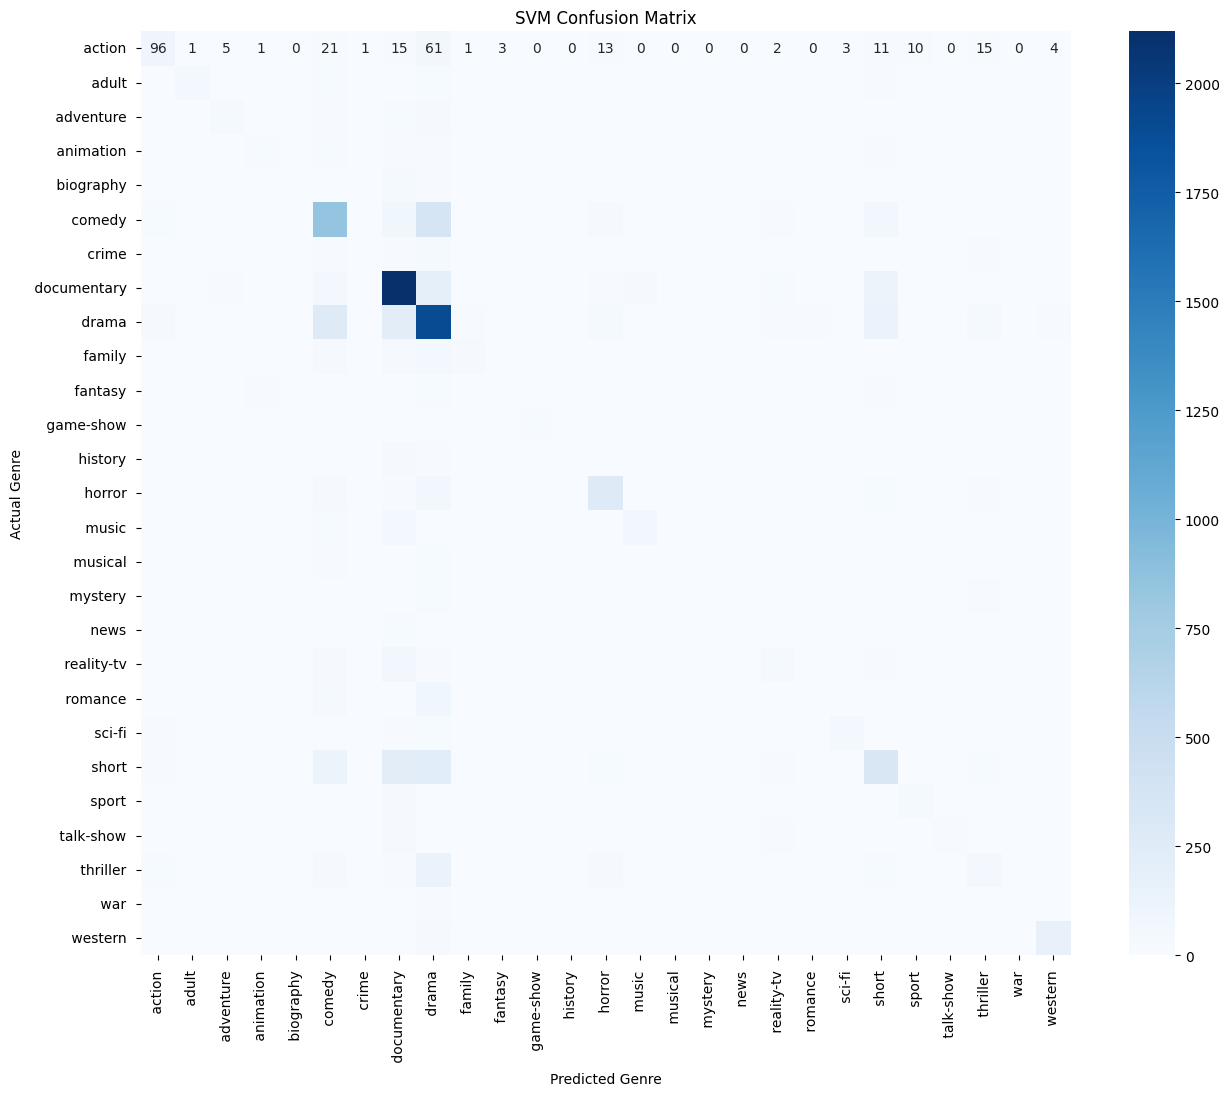

In [18]:
# Vectorize the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Plot'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['Plot'])
y_train = train_df['Genre']
y_val = val_df['Genre']
# Train the LinearSVC classifier
svm_classifier = LinearSVC(max_iter=10000)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions and confusion matrix for SVM
y_pred_svm = svm_classifier.predict(X_val_tfidf)
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm, labels=svm_classifier.classes_)

# Display the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.title('SVM Confusion Matrix')
plt.show()